In [1]:
# !pip install seaborn
# !pip install scikit-learn

##### Imports and Setup

In [2]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from collections import Counter
from scipy.stats import ortho_group

sys.path.append("./Scripts/")
from skip_gram import *
from skip_gram_utils import * 
from models import *

'''
CORPUS
'''
file1 = './Data/toy_corpus.txt'
file2 = './Data/corpus.txt'
# data = get_data(file2)[:200]
data = get_data(file1)
count = Counter(data)

'''
ENCODINGS AND VOCABULARY
'''
word_to_int, int_to_word, vocabulary = encode_words(data)

'''
HYPER-PARAMETERS
'''
window_size = 2
learning_rate = 0.01
vocab_size = len(vocabulary)
embedding_dim = 10
EPOCHS = 200

'''
VISUALIZATION SETUP
'''
sns.set_style('darkgrid') # dark grid, white grid, dark, white, ticks
plt.rc('axes',  titlesize=14, labelsize=12)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('font', size=12)

'''
TRAINING DATA
'''
x_train, y_train, training_data = generate_data(data, window_size, word_to_int)
ground_truth_table = ground_truth(vocab_size, training_data, window_size)

##### Hierarchical Softmax Model
***
* We initialize a Huffman Tree with words of the vocabulary as leaves for the output layer.
* The root will be the start of our 'output layer.'
* After we get the hidden layer from the embedding, we take the inner product with the vector of the current root and move left->right based on our target/context word's huffman encodings. 
    * After taking the inner product, we first activate with sigmoid before continuing. On successive iterations, we multiply these sigmoid values to get our final probability.

In [3]:
model = SkipGramModel(learning_rate, count, vocab_size, int_to_word, word_to_int)
history, states = model.train(x_train, y_train, epochs=EPOCHS, split=50, verbose=0)

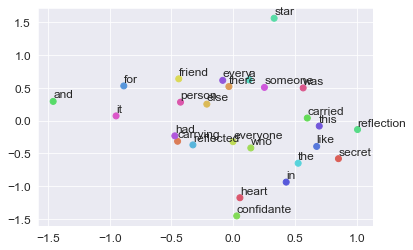

In [4]:
visualize_data(vectors_over_time=states, x=x_train, epochs=EPOCHS, int_to_word=int_to_word, savefile='Animations/anim.gif')

##### Model Performance
***
* Loss over time graph
* Prediction context vs groud truth context comparison
* Time complexity analysis 
    * Scaling vocab size

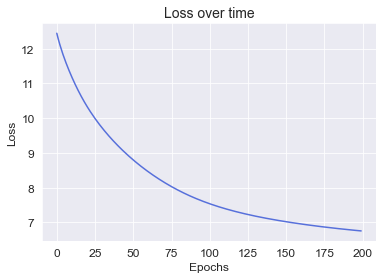

In [5]:
plt.title('Loss over time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history, color = sns.color_palette('hls', 8)[5])
plt.show()

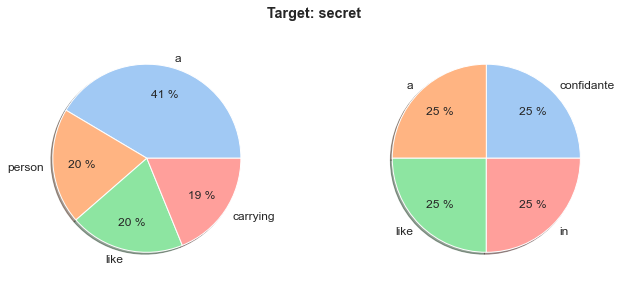

In [6]:
show_predictions(model, ground_truth_table, window=window_size, num_samples=1, vocab=vocabulary, count=count, word_to_int=word_to_int, int_to_word=int_to_word, random=True)

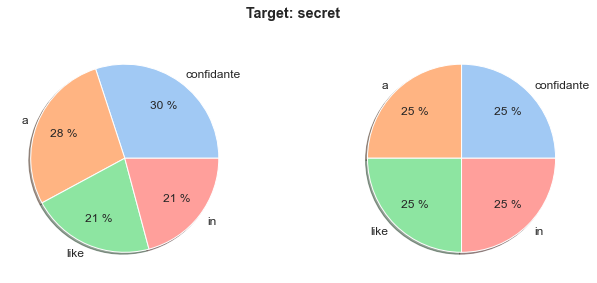

In [7]:
show_predictions(model, ground_truth_table, window=window_size, num_samples=1, vocab=vocabulary, count=count, word_to_int=word_to_int, int_to_word=int_to_word, random=False)

##### Time Complexity

In [8]:
step_times, sizes = train_time_scaling(file2, itrs = 50, step_size = 10)

0.0% complete
20.0% complete
40.0% complete
60.0% complete
80.0% complete
100.0% complete


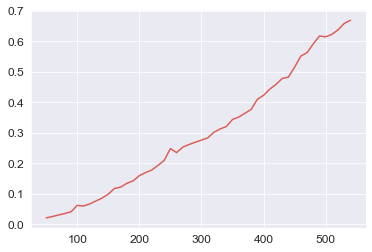

In [9]:
plt.plot(sizes, step_times, color = sns.color_palette('hls')[0])
plt.show()

##### Full Softmax Model
***
* Here we have a full set of output representations.
* This is the normal dense softmax implementation.

In [10]:
embedding, output_weights = create_model_params(embedding_dim, vocab_size)
states1, history1 = train(x_train, y_train, embedding, output_weights, epochs=EPOCHS, learning_rate=0.01, verbose=0)

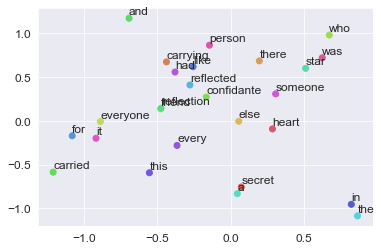

In [11]:
visualize_data(vectors_over_time=states1, x=x_train, epochs=EPOCHS, int_to_word=int_to_word, savefile='./Animations/anim_dense.gif')

##### Full Softmax Performance
***
* Loss over time
* Time complexity analysis 
    * Scaling vocab size

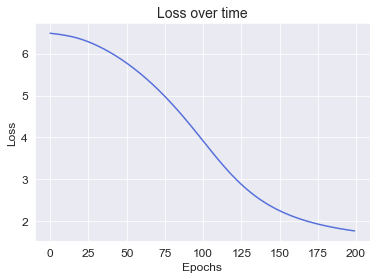

In [12]:
plt.title('Loss over time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history1, color = sns.color_palette('hls', 8)[5])
plt.show()

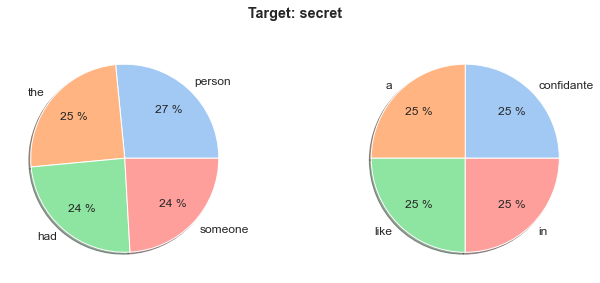

In [13]:
dense_predictions(embedding, output_weights, ground_truth_table, window=window_size, num_samples=1, vocab=vocabulary, word_to_int=word_to_int, int_to_word=int_to_word, random=True)

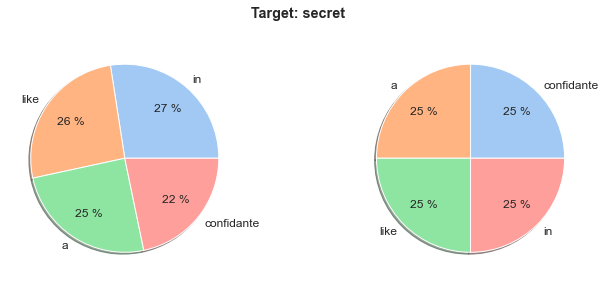

In [14]:
dense_predictions(embedding, output_weights, ground_truth_table, window=window_size, num_samples=1, vocab=vocabulary, word_to_int=word_to_int, int_to_word=int_to_word, random=False)

##### Time Complexity Comparison

In [15]:
step_times_1, sizes = train_time_scaling(file2, itrs=50, step_size=10, mode=1)

0.0% complete
20.0% complete
40.0% complete
60.0% complete
80.0% complete
100.0% complete


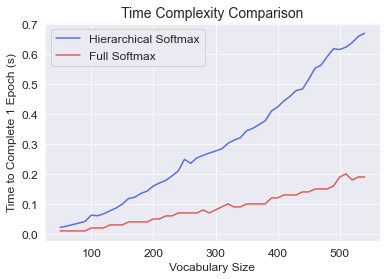

In [16]:
plt.title('Time Complexity Comparison')
plt.xlabel('Vocabulary Size')
plt.ylabel('Time to Complete 1 Epoch (s)')
plt.plot(sizes, step_times, label = 'Hierarchical Softmax', color = sns.color_palette('hls', 8)[5])
plt.plot(sizes, step_times_1, label = 'Full Softmax', color = sns.color_palette('hls', 8)[0])
plt.legend(loc='upper left')
plt.show()